In [156]:
import pandas as pd

file_path = r"parkinsons_updrs.data"
df = pd.read_csv(file_path)
print(df.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"parkinsons_updrs.data"
df = pd.read_csv(file_path)


# Basic Info
print(" Dataset shape:", df.shape)
print("\n Column names:\n", df.columns.tolist())
print("\n First few rows:")
print(df.head())

# Check for missing values
print("\n Missing values per column:\n", df.isnull().sum())

# Statistical summary
print("\n Statistical Summary:")
print(df.describe())


 Dataset shape: (5875, 22)

 Column names:
 ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

 First few rows:
   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0

so first let's check for the missing values : 

In [158]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display only columns with missing values (if any)
missing = missing_values[missing_values > 0]

if missing.empty:
    print(" No missing values found in the dataset.")
else:
    print(" Missing values found:\n")
    print(missing)

 No missing values found in the dataset.


so now we will see the coorelation with the target to see which features we can drop : 

In [159]:
correlation_matrix = df.corr()

# Correlation with the target variables
print("📊 Correlation with motor_UPDRS:\n")
print(correlation_matrix["motor_UPDRS"].sort_values(ascending=False))


📊 Correlation with motor_UPDRS:

motor_UPDRS      1.000000
total_UPDRS      0.947231
age              0.273665
subject#         0.252919
PPE              0.162433
Shimmer:APQ11    0.136560
RPDE             0.128607
Shimmer(dB)      0.110076
Shimmer          0.102349
Shimmer:APQ5     0.092105
Jitter(%)        0.084816
Shimmer:APQ3     0.084261
Shimmer:DDA      0.084260
Jitter:PPQ5      0.076291
NHR              0.074967
Jitter:DDP       0.072698
Jitter:RAP       0.072684
test_time        0.067918
Jitter(Abs)      0.050903
sex             -0.031205
DFA             -0.116242
HNR             -0.157029
Name: motor_UPDRS, dtype: float64


now we split the data in to train test and validation sets : 

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [161]:
# Step 1: Drop target columns and optionally low-correlation features
X = df.drop(columns=['motor_UPDRS', 'total_UPDRS' , 'subject#']) 
y = df['total_UPDRS']

# Step 2: Standardize the features (temporarily to maintain flow)
scaler_temp = StandardScaler()
X_scaled = scaler_temp.fit_transform(X)

# Convert X_scaled back to a DataFrame with the same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 3: First split: 80% train_val + 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42)

# Step 4: Second split: 75% train + 25% val from the 80% remaining
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)

# Step 5: Fit scaler only on the training set (from original scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 6: Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Check shapes (optional)
print("Train set size:", X_train_scaled.shape)
print("Validation set size:", X_val_scaled.shape)
print("Test set size:", X_test_scaled.shape)


Train set size: (3525, 19)
Validation set size: (1175, 19)
Test set size: (1175, 19)


In [162]:
print(X_train.columns)


Index(['age', 'sex', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE'],
      dtype='object')


In [163]:
# Let's say you want the unique values of the 'sex' column
unique_values = X_train_scaled['HNR'].unique()

# Print the unique values
print(unique_values)


[ 1.18050827 -1.35568438  0.30550566 ... -0.10881142  0.55764852
 -1.05947996]


In [164]:
# # You can select a subset of features that are most relevant for your target
# sns.pairplot(df[['age', 'RPDE', 'PPE', 'Shimmer:APQ11', 'total_UPDRS']], hue='total_UPDRS', palette='coolwarm')
# plt.show()


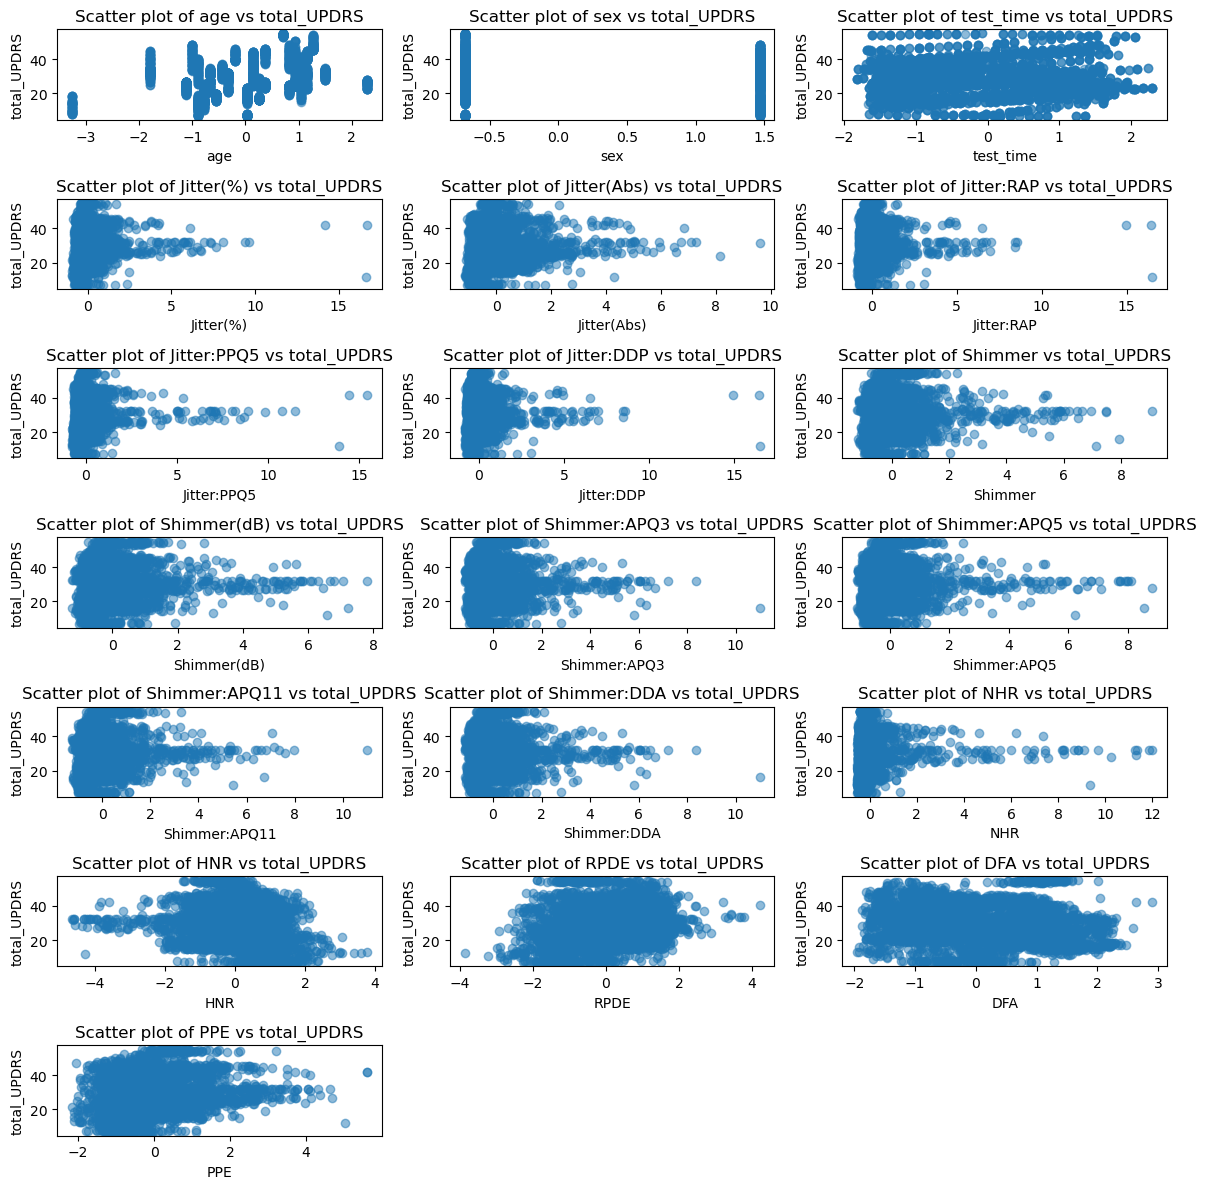

In [165]:
import matplotlib.pyplot as plt

# List of feature columns (excluding the target variable)
features = X_train.columns  # Use the feature columns from the training data

# Plotting scatter plots for all features vs total_UPDRS
plt.figure(figsize=(12, 12))
n_features = len(features)

# Loop through each feature and plot
for i, feature in enumerate(features):
    plt.subplot(n_features // 3 + 1, 3, i + 1)  # Adjust subplot grid size
    plt.scatter(X_train[feature], y_train, alpha=0.5)
    plt.title(f"Scatter plot of {feature} vs total_UPDRS")
    plt.xlabel(feature)
    plt.ylabel("total_UPDRS")

plt.tight_layout()
plt.show()


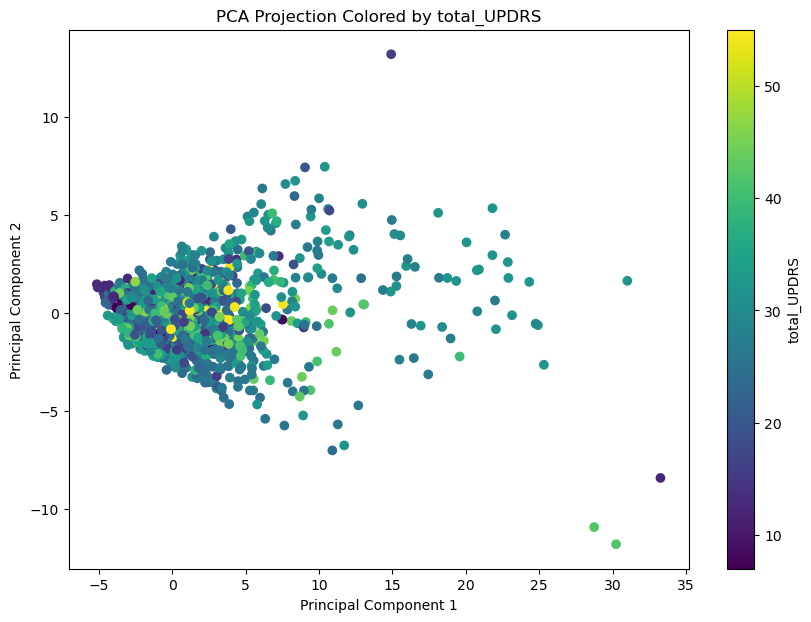

In [166]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Create scatter plot with colorbar
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection Colored by total_UPDRS')
cbar = plt.colorbar(scatter)
cbar.set_label('total_UPDRS')
plt.show()


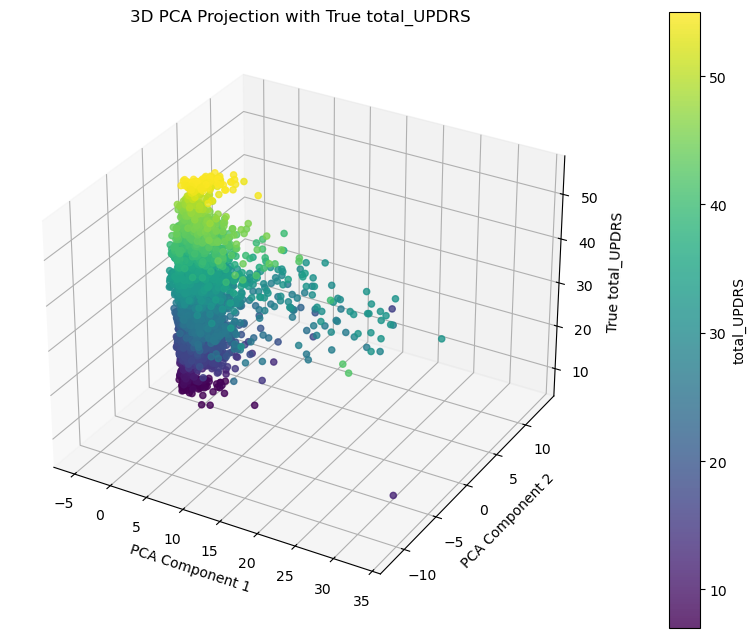

In [167]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D plotting)

# Apply PCA to reduce features to 2D (on scaled data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)  # X_train_scaled is your scaled training data

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter: X=PCA1, Y=PCA2, Z=target
scatter = ax.scatter(
    X_pca[:, 0],     # PCA component 1
    X_pca[:, 1],     # PCA component 2
    y_train,         # true target: total_UPDRS
    c=y_train,       # coloring by target value
    cmap='viridis',
    alpha=0.8
)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('True total_UPDRS')
ax.set_title('3D PCA Projection with True total_UPDRS')

# Add colorbar
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('total_UPDRS')

plt.show()


In [168]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor


In [169]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(tree, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)


Best parameters: {'max_depth': 13, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 7}


c:\Users\nesri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nesri\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nesri\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\nesri\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\nesri\anaconda3\Lib\site-packages

In [170]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 16}
# {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 15}
# {'max_depth': 13, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 7}

dt_regressor = DecisionTreeRegressor(
    max_depth=13,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=7,
    random_state=42
)

dt_regressor.fit(X_train, y_train)

# Fit the model on the training data
dt_regressor.fit(X_train_scaled, y_train)


DecisionTreeRegressor(max_depth=13, min_samples_split=7, random_state=42)

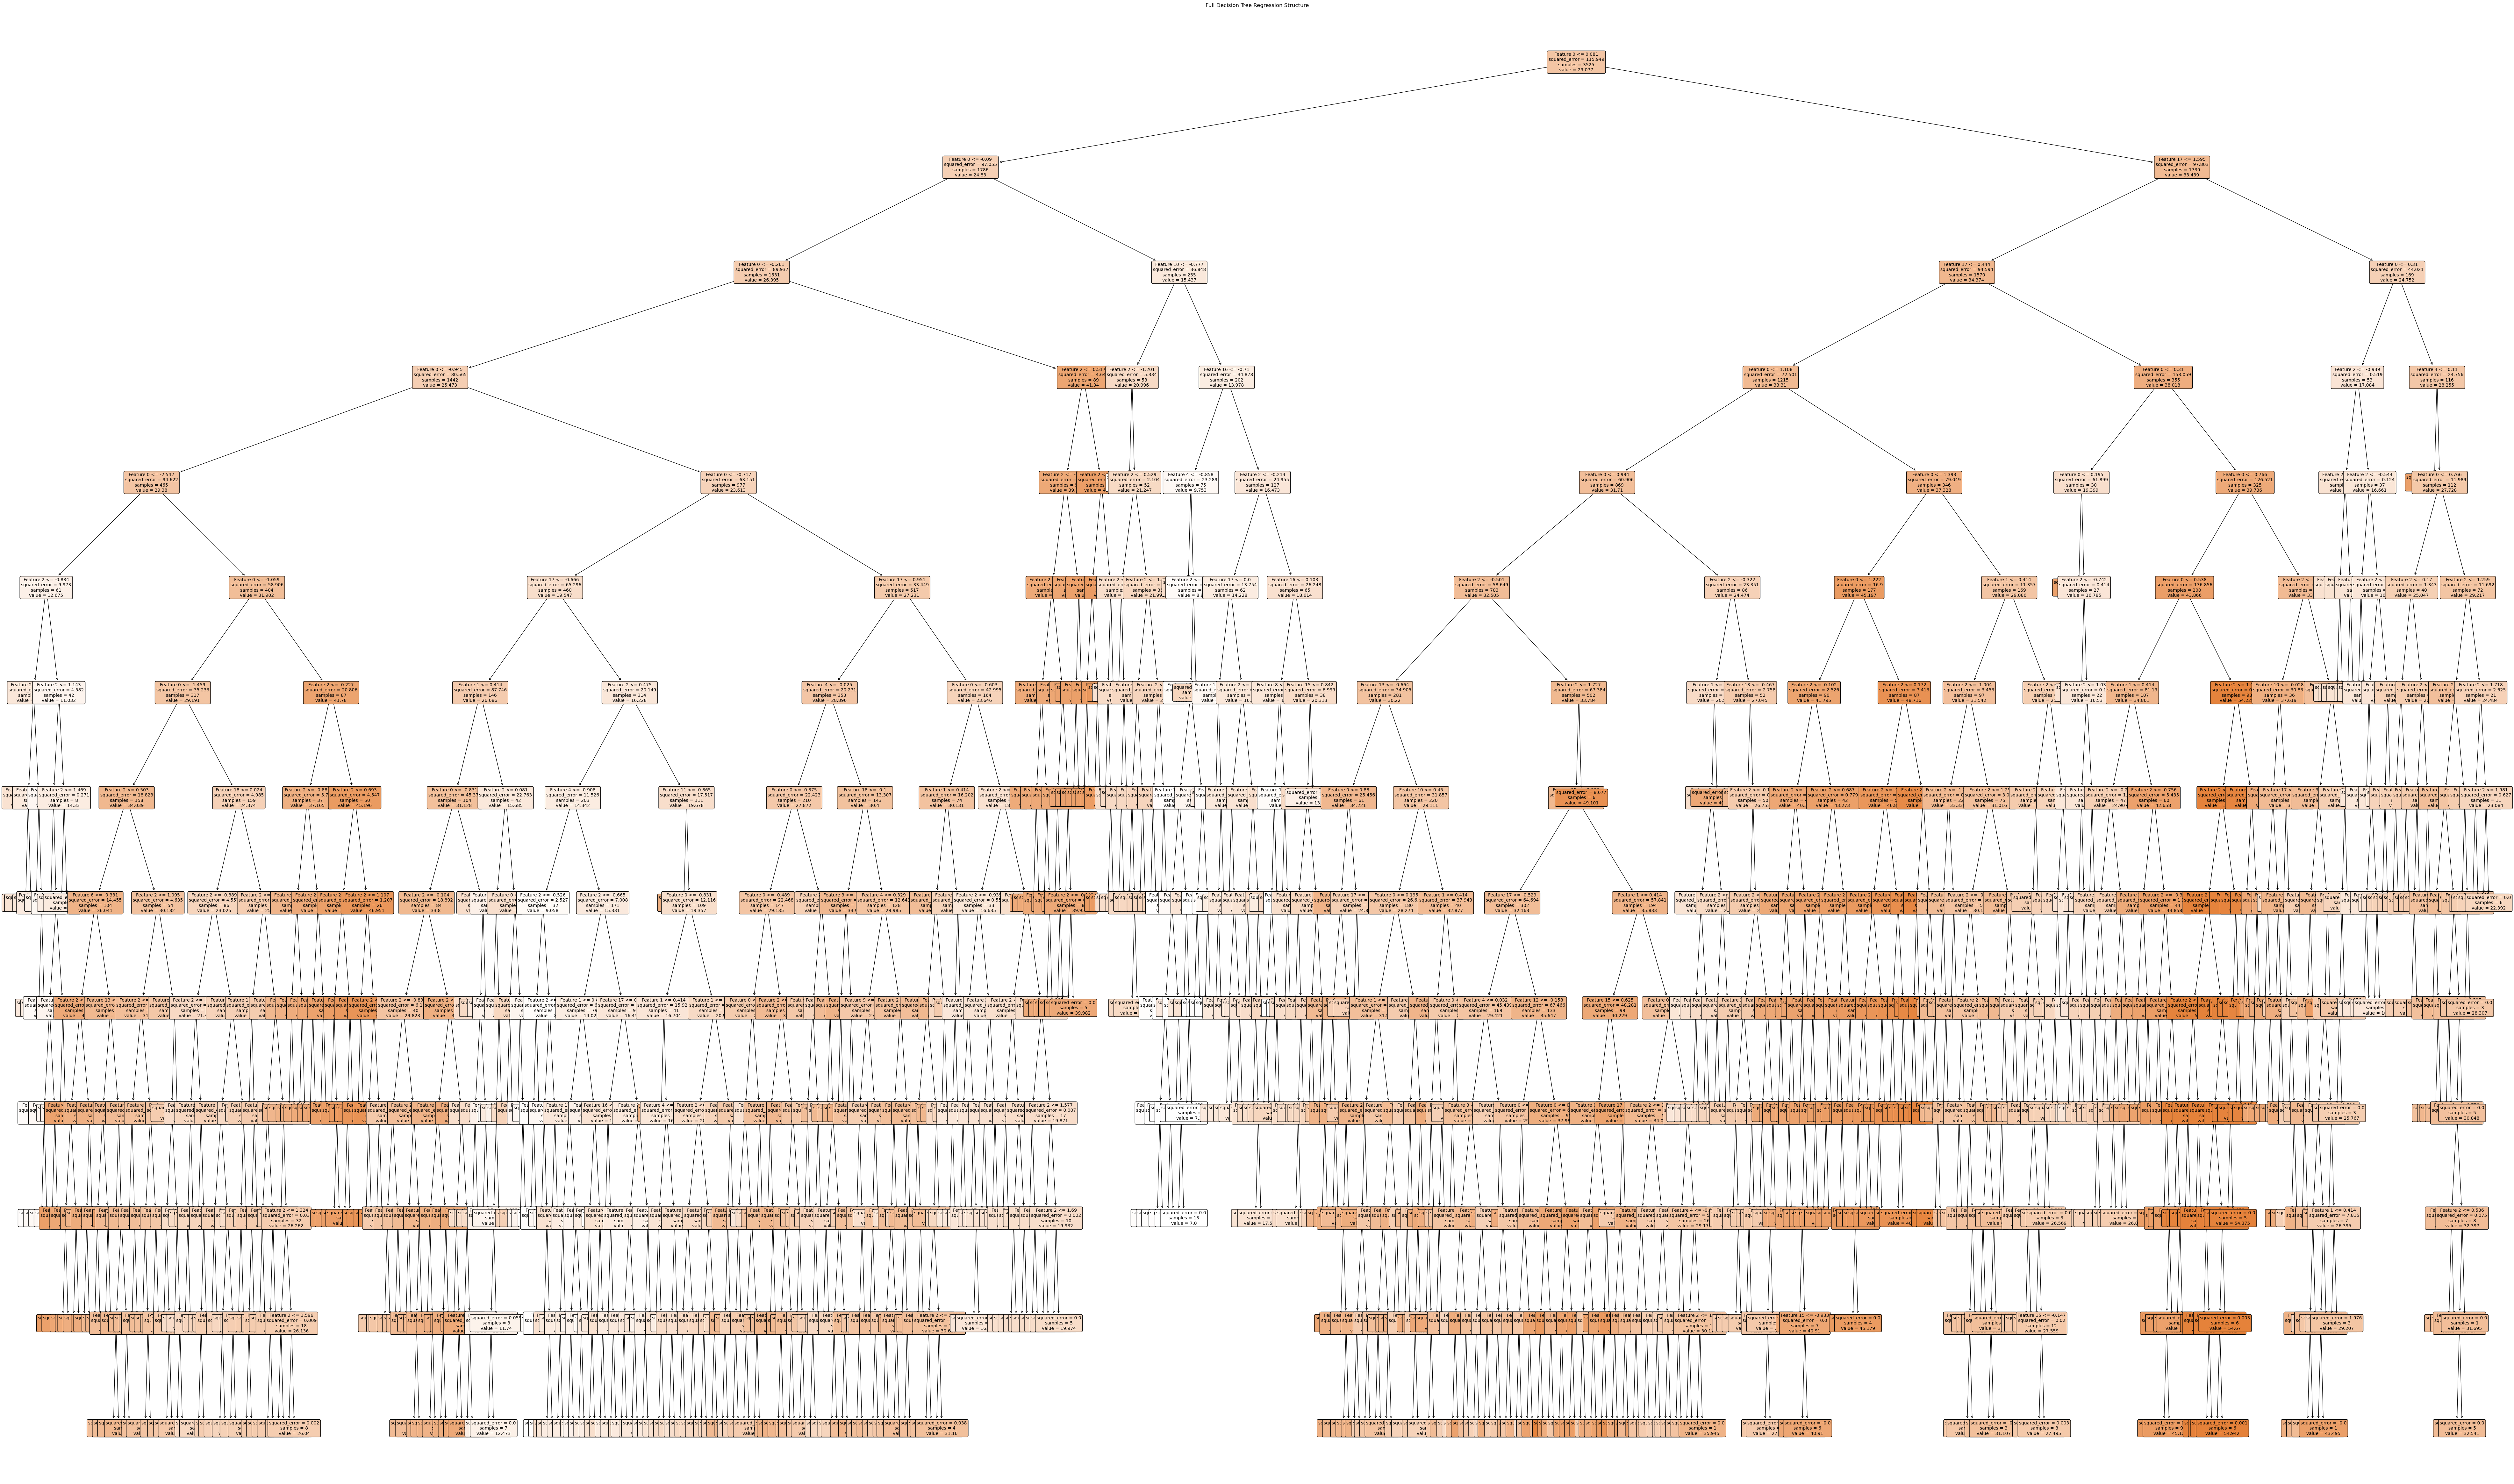

In [171]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the entire tree
plt.figure(figsize=(100,60))  # Adjust size depending on tree depth
plot_tree(dt_regressor, 
          feature_names=[f'Feature {i}' for i in range(X.shape[1])],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Full Decision Tree Regression Structure")
plt.show()


In [172]:
# Predict on the validation and test sets
y_val_pred = dt_regressor.predict(X_val_scaled)
y_test_pred = dt_regressor.predict(X_test_scaled)


In [173]:
X_train

age       sex  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
222  -0.771467 -0.682509   1.608057  -0.530564    -0.585796   -0.399284   
5651  0.362220  1.465182  -0.547420   2.097575     1.408629    2.136290   
1340  0.362220 -0.682509   0.624918   0.232272     0.469504    0.289035   
3873  1.495908 -0.682509  -1.318850  -0.359860    -0.545496   -0.380075   
5316  0.135483 -0.682509   0.496178  -0.681709    -0.772009   -0.645798   
...        ...       ...        ...        ...          ...         ...   
1648 -0.317992 -0.682509   0.364631  -0.128697    -0.204198   -0.034315   
376  -0.884836 -0.682509  -0.291044  -0.687044    -0.768674   -0.600977   
427  -0.884836 -0.682509   0.102679  -0.457659    -0.701971   -0.408888   
1619 -1.111573 -0.682509  -0.812217  -0.473663    -0.598303   -0.380075   
706   1.155802 -0.682509  -0.551481   1.277838     1.718799    1.191853   

      Jitter:PPQ5  Jitter:DDP   Shimmer  Shimmer(dB)  Shimmer:APQ3  \
222     -0.377049   -0.399296 -0.613759    -0.660024     -0.586711   
5651     1.509734    2.136269  0.922650     1.507336      0.713531   
1340    -0.007196    0.289021 -0.552984    -0.508005     -0.514182   
3873    -0.323447   -0.381154 -0.060203     0.221687     -0.224064   
5316    -0.570015   -0.644742 -0.828214    -0.842447     -0.867008   
...           ...         ...       ...          ...           ...   
1648    -0.141201   -0.034328 -0.487177    -0.303865     -0.610132   
376     -0.511053   -0.599921 -1.030668    -1.050930     -1.043043   
427     -0.331487   -0.409967 -0.232850    -0.260431     -0.172689   
1619    -0.331487   -0.380087 -0.304464    -0.251744     -0.261084   
706      0.601184    1.191835  0.228963     0.399767      0.345595   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR       HNR      RPDE  \
222      -0.576395      -0.681073    -0.586454 -0.486634  1.187095 -1.426292   
5651      0.707925       1.220406     0.713787  1.198417 -1.375172  0.793913   
1340     -0.564392      -0.596507    -0.513925 -0.142171  0.303096 -0.639084   
3873     -0.180296       0.141567    -0.224311  0.019521  0.868035  0.134061   
5316     -0.819455      -0.847202    -0.866751 -0.475559  1.625948 -1.045513   
...            ...            ...          ...       ...       ...       ...   
1648     -0.512179      -0.337806    -0.610127 -0.173635  0.139255  0.451360   
376      -0.967692      -1.104902    -1.043289 -0.487069  1.470030 -1.717546   
427      -0.174895      -0.192193    -0.172936 -0.313531 -0.115480 -0.286430   
1619     -0.265517      -0.333302    -0.260827 -0.298738  0.557831 -0.432701   
706       0.152187      -0.006048     0.345599  0.991689 -1.075923  1.920405   

           DFA       PPE  
222   0.974673 -0.885218  
5651  0.640521  2.791659  
1340  0.696659  1.325062  
3873 -0.691149  0.066682  
5316 -0.718090 -1.421873  
...        ...       ...  
1648 -0.926705 -0.435664  
376  -0.835304 -0.865871  
427  -1.509813 -0.329751  
1619 -1.354938 -0.828163  
706  -1.156196  1.384958  

[3525 rows x 19 columns]

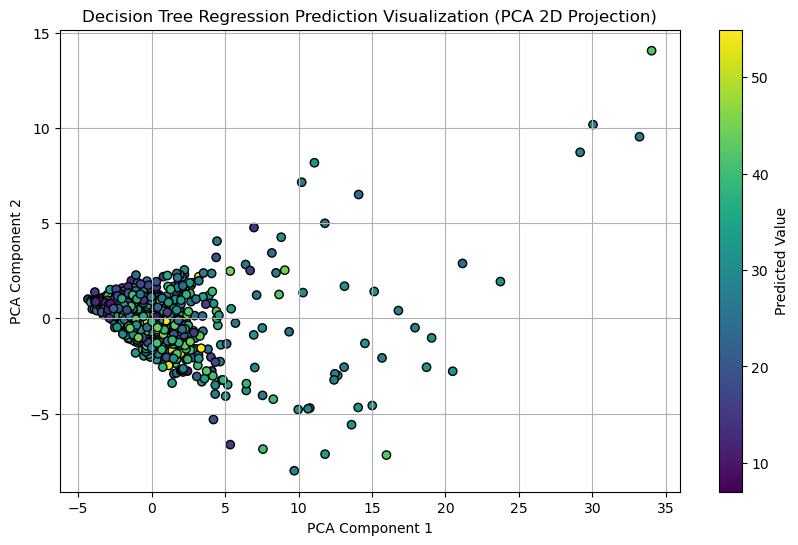

In [174]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Plot decision surface (scatter colored by prediction)
plt.figure(figsize=(10, 6))
sc = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pred, cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='Predicted Value')
plt.title("Decision Tree Regression Prediction Visualization (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [ ]:
X_train_scaled

In [175]:
# Evaluate the model using Mean Squared Error and R^2
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Validation MSE: {mse_val}")
print(f"Validation R^2: {r2_val}")

print(f"Test MSE: {mse_test}")
print(f"Test R^2: {r2_test}")


Validation MSE: 11.879903372684744
Validation R^2: 0.8954765497528218
Test MSE: 11.544305543438705
Test R^2: 0.8958217805641763


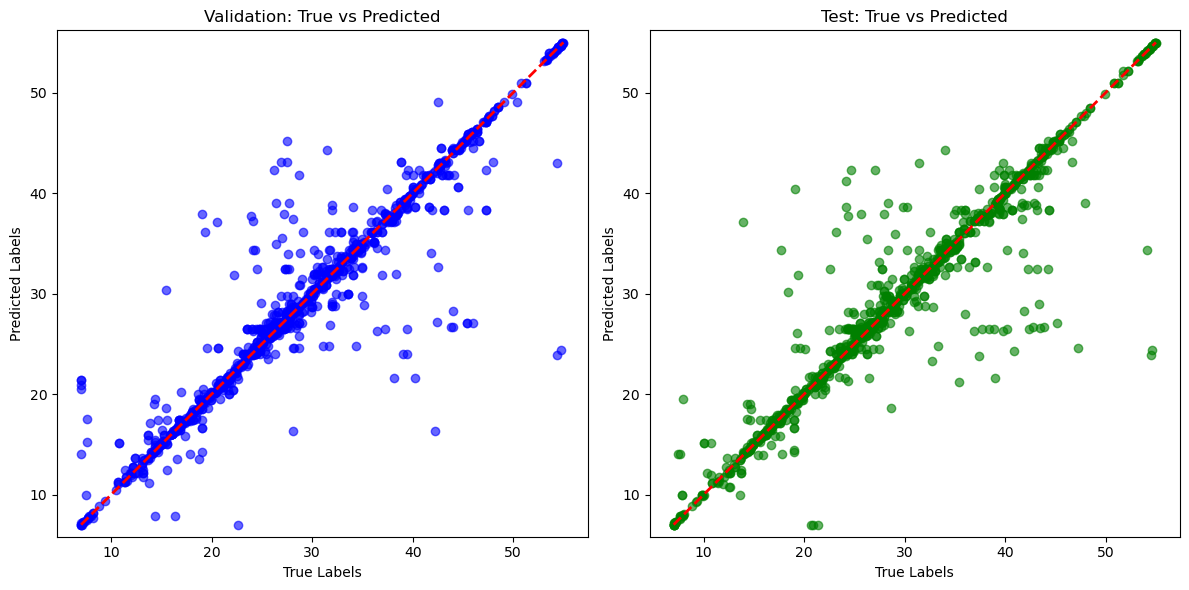

In [176]:
# Plotting for validation set
plt.figure(figsize=(12, 6))

# Scatter plot for validation data
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, color='blue', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)
plt.title('Validation: True vs Predicted')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.axis('equal')

# Plotting for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Test: True vs Predicted')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


# Random forest 

In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
import numpy as np

# 1. Create the base model
rf = RandomForestRegressor(random_state=42)

In [178]:
# 2. Define the parameter search space
param_dist = {
    'n_estimators': randint(50, 200),          # number of trees
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [179]:
# 3. RandomizedSearchCV
random_search = RandomizedSearchCV(rf,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   random_state=42,
                                   n_jobs=-1,
                                   verbose=2)


In [ ]:
# 4. Fit on training data
random_search.fit(X_train, y_train)

# 5. Print best parameters
print("✅ Best Parameters Found:")
print(random_search.best_params_)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
# 6. Get the best model
best_rf = random_search.best_estimator_
#'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 103

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    max_error,
)
import numpy as np

# 7. Predict
y_pred = best_rf.predict(X_test)

# 8. Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# 9. Print all metrics
print("\n📊 Model Evaluation on Test Set:")
print(f"✅ R² Score                : {r2:.4f}")
print(f"📉 Mean Absolute Error     : {mae:.4f}")
print(f"📉 Mean Squared Error      : {mse:.4f}")
print(f"📉 Root Mean Squared Error : {rmse:.4f}")
print(f"📉 Mean Absolute % Error   : {mape:.4f}")
print(f"📉 Max Error               : {max_err:.4f}")



📊 Model Evaluation on Test Set:
✅ R² Score                : 0.9972
📉 Mean Absolute Error     : 0.2947
📉 Mean Squared Error      : 0.3147
📉 Root Mean Squared Error : 0.5610
📉 Mean Absolute % Error   : 0.0115
📉 Max Error               : 8.4039
